## How the proportion of thefts of vehicles differ in the Hastings-Sunrise neighborhood from years 2021 and 2022

 **Authors**: Haobo Li, Ahana Thakur, Junbo Rao, Irene Wan

### Introduction

The year 2022 has seen an unprecedented rise in inflation rates. As a result of this, there has been an increase of crimes within Vancouver. Historically, studies have shown a positive trend between crime and inflation rates due to the increased cost of living (Foon Tang and Hooi Lean). Therefore, our project will be investigating whether crime rates have increased in 2022. 

We will be doing this by comparing the proportion of thefts of vehicles from the Hastings-Sunrise neighborhood from years 2021 and 2022 (Crime data in Hastings-Sunrise, VPD). The dataset that we have used includes all types of offenses or crimes that have taken place in the Hastings-Sunrise neighborhood and gives us the number of times those offenses have taken place in each year. We are using theft of vehicle as our indicator that crime has increased due to inflation, since there has been a 9.8% increase in theft of cars from 2021 (Crime statistics, Vancouver Police Department).

Therefore, we will be using hypothesis testing to investigate our question. We will find the proportion of theft of vehicles from 2021 ($\hat{p}_2$) and proportion of theft of vehicles from 2022 ($\hat{p}_1$) and compare them. Our null hypothesis will be $H_0: \hat{p}_1 – \hat{p}_2 = 0$, while our alternative hypothesis will be $H_A: \hat{p}_1 – \hat{p}_2 > 0$

### Preliminary Data Analysis

#### Data Processing


In [1]:
#Load libraries
set.seed(1)
library(tidyverse)
library(broom)
library(repr)
library(digest)
library(infer)
library(gridExtra)
library(readxl)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ dials        1.0.0     ✔ tune         1.0.0
✔ modeldata    1.0.1     ✔ workflows    1.0.0
✔ parsnip      1.0.1     ✔ workflowsets 1.0.0
✔ recipes      1.0.1     ✔ yardstick    1.1.0
✔ rsample      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ gridExtra::combine() masks dplyr::combine()
✖ scales::discard()    masks purrr::discard()
✖ dplyr::filter()      masks stats::filte

In [2]:
#Load dataset from web
crime_data_2021 <- read.csv("https://github.com/Haobo11/stat201-group-project/raw/main/crimedata_csv_Hastings-Sunrise_2021.csv")
crime_data_2022 <- read.csv("https://github.com/Haobo11/stat201-group-project/raw/main/crimedata_csv_Hastings-Sunrise_2022.csv")

#Preview datasets
head(crime_data_2021)
head(crime_data_2022)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,Theft from Vehicle,2021,8,17,21,57,1XX RENFREW ST,Hastings-Sunrise,496804.9,5459011
2,Theft from Vehicle,2021,9,20,20,45,20XX CASSIAR ST,Hastings-Sunrise,497740.0,5457015
3,Theft from Vehicle,2021,3,5,3,30,20XX CASSIAR ST,Hastings-Sunrise,497740.0,5457017
4,Theft from Vehicle,2021,2,15,12,0,21XX KAMLOOPS ST,Hastings-Sunrise,496024.4,5456995
5,Theft from Vehicle,2021,6,28,12,0,21XX LILLOOET ST,Hastings-Sunrise,497165.9,5456990
6,Theft from Vehicle,2021,4,14,3,0,21XX NANAIMO ST,Hastings-Sunrise,495887.6,5456922


,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,Theft from Vehicle,2022,5,3,22,0,1XX KOOTENAY ST,Hastings-Sunrise,498134.7,5458960
2,Theft from Vehicle,2022,5,26,7,30,1XX N RENFREW ST,Hastings-Sunrise,496800.4,5459316
3,Theft from Vehicle,2022,1,10,18,0,1XX NANAIMO ST,Hastings-Sunrise,495893.3,5459013
4,Theft from Vehicle,2022,9,25,17,55,1XX RENFREW ST,Hastings-Sunrise,496795.9,5458959
5,Theft from Vehicle,2022,4,29,20,0,20XX KAMLOOPS ST,Hastings-Sunrise,496024.4,5457091
6,Theft from Vehicle,2022,8,27,2,0,20XX NANAIMO ST,Hastings-Sunrise,495887.8,5457043


In [3]:
#Tidying data
theft_vehicle <- rbind(crime_data_2021, crime_data_2022) %>%   #combining dataframes
    select(TYPE, YEAR) %>%   #selecting only columns with the type of crime and year it occurred
    mutate(TYPE = if_else(TYPE == "Theft of Bicycle", "Other", TYPE),   
           TYPE = if_else(TYPE == "Theft from Vehicle", "Other", TYPE),
           TYPE = if_else(TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)", "Other", TYPE),
           TYPE = if_else(TYPE == "Vehicle Collision or Pedestrian Struck (with Injury)", "Other", TYPE),
           TYPE = if_else(TYPE == "Break and Enter Commercial", "Other", TYPE),
           TYPE = if_else(TYPE == "Break and Enter Residential/Other", "Other", TYPE),
           TYPE = if_else(TYPE == "Homicide", "Other", TYPE),
           TYPE = if_else(TYPE == "Mischief", "Other", TYPE),
           TYPE = if_else(TYPE == "Offence Against a Person", "Other", TYPE),
           TYPE = if_else(TYPE == "Other Theft", "Other", TYPE))   #separating crime of interest, Theft of Vehicle, from other crimes

#Changing YEAR variables from integer to factor
theft_vehicle$YEAR <- as.factor(theft_vehicle$YEAR)

head(theft_vehicle)

,TYPE,YEAR
,<chr>,<fct>
1,Other,2021
2,Other,2021
3,Other,2021
4,Other,2021
5,Other,2021
6,Other,2021


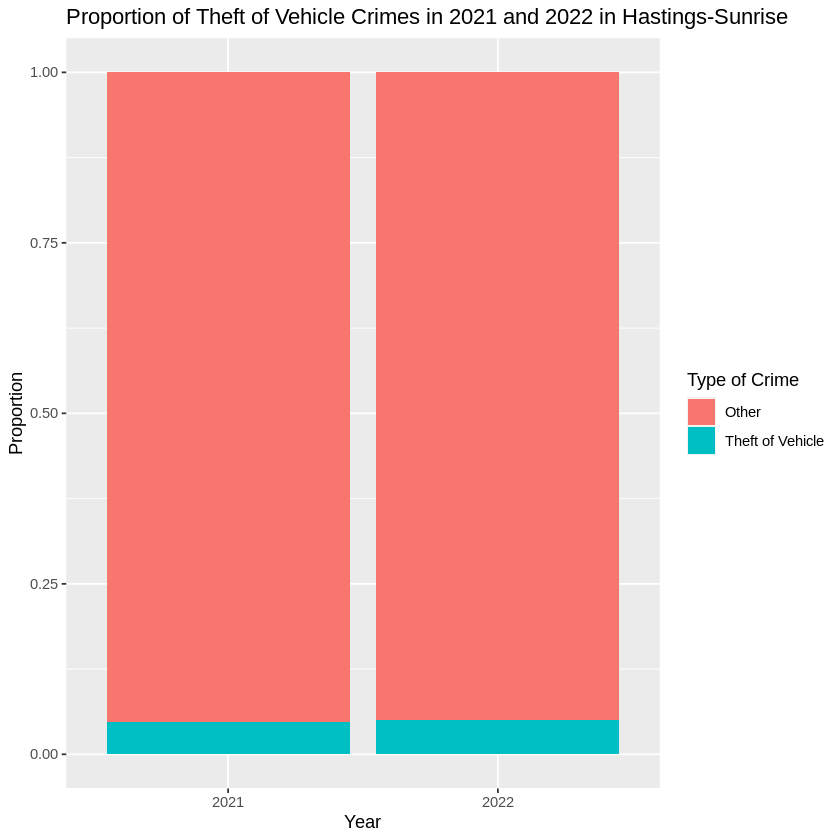

In [4]:
#Visualizing the proportion of crimes that were Theft of Vehicle
theft_vehicle_plot <- theft_vehicle %>%
    ggplot() +
        geom_bar(aes(x = YEAR, fill = TYPE), position = "fill") +
        labs(x = "Year", y = "Proportion", fill = "Type of Crime") +
        ggtitle("Proportion of Theft of Vehicle Crimes in 2021 and 2022 in Hastings-Sunrise")
theft_vehicle_plot

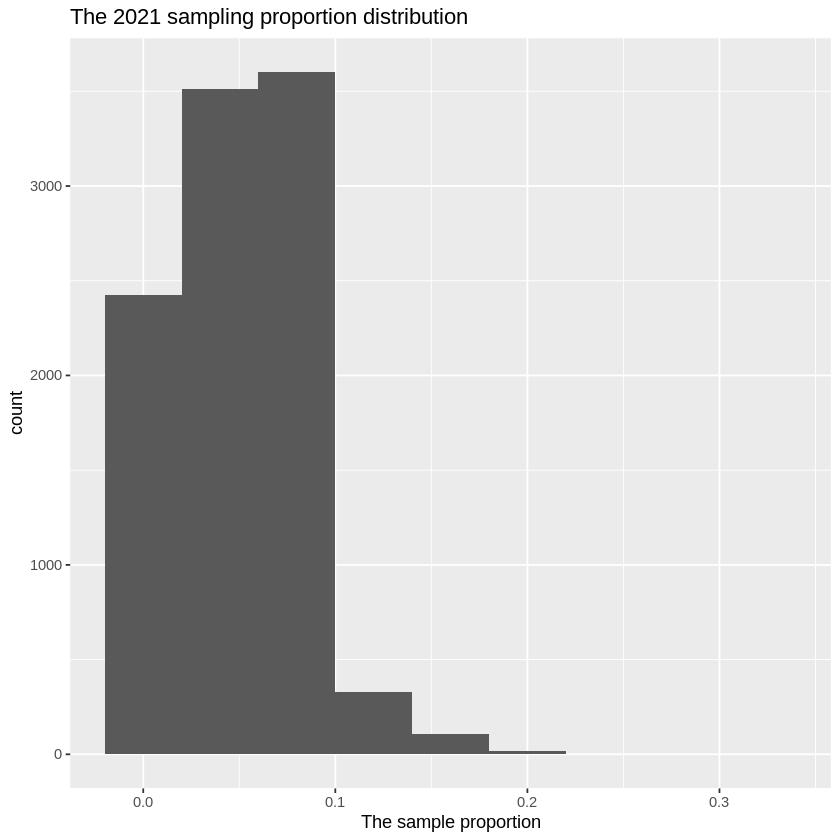

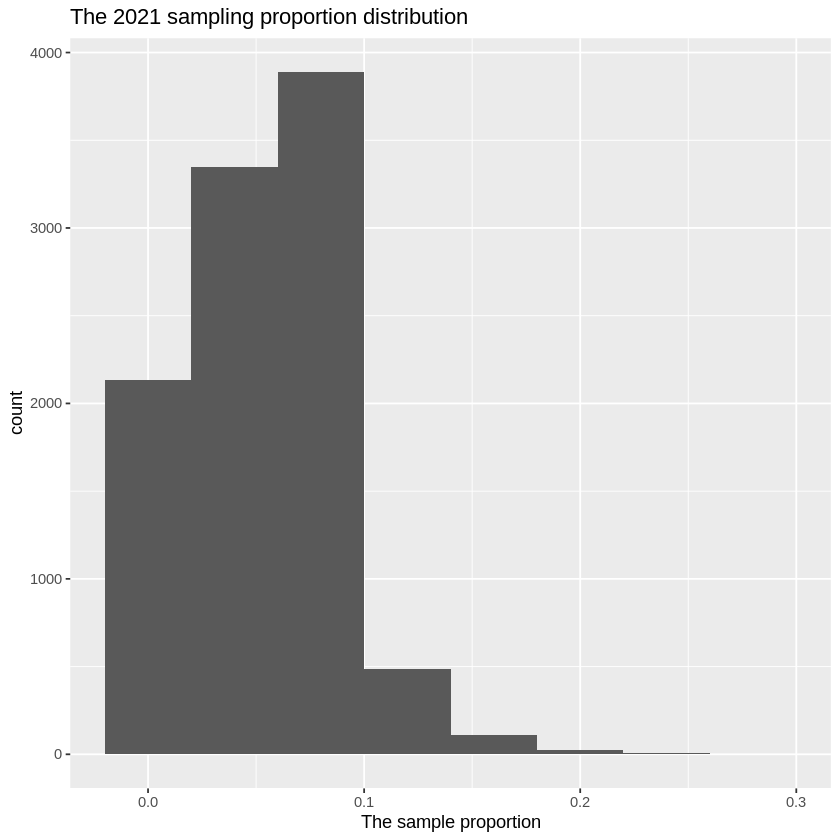

In [5]:
#Creating 10,000 bootstrap samples of size 30 for the 2021 dataset and calculating the mean proportion
samples_2021 <- crime_data_2021 |>
    rep_sample_n(size = 30, reps = 10000, replace = TRUE) |>
    group_by(replicate) |>
    summarize(sample_pro = mean(TYPE == "Theft of Vehicle"))

#Creating 10,000 bootstrap samples of size 30 for the 2022 dataset and calculating the mean proportion
samples_2022 <- crime_data_2022 |>
    rep_sample_n(size = 30, reps = 10000, replace = TRUE) |>
    group_by(replicate) |>
    summarize(sample_pro = mean(TYPE == "Theft of Vehicle"))

#Visualizing the sampling proportion distributions
sampling_dist_2021 <- samples_2021|>
    ggplot()+
        geom_histogram(aes(x= sample_pro), binwidth = 0.04) +
        xlab("The sample proportion") +
        ggtitle("The 2021 sampling proportion distribution")

sampling_dist_2022 <- samples_2022|>
    ggplot()+
        geom_histogram(aes(x= sample_pro), binwidth = 0.04) +
        xlab("The sample proportion") +
        ggtitle("The 2021 sampling proportion distribution")

sampling_dist_2021
sampling_dist_2022

In [6]:
# Calculate the number of crime which type is Theft of Vehicle
# respectively in 2021 and 2022 and the total number of the crimes
# in 2021 and 2022
n_2021 <- nrow(crime_data_2021)

n_2022 <- nrow(crime_data_2022)

n_2021_tov <- crime_data_2021|>
    filter(TYPE == "Theft of Vehicle") |>
    nrow()

n_2022_tov <- crime_data_2022|>
    filter(TYPE == "Theft of Vehicle") |>
    nrow()

# Calculate the Theft from Vehicle respectively in 2021 and 2022
p_2021 <- n_2021_tov/n_2021
p_2022 <- n_2022_tov/n_2022

# Calculate the pooled proportion
p_p <- (n_2021_tov+n_2022_tov)*(n_2021 + n_2022)^(-1)

# Calculate the test_statistic
test_statistic <- (p_2022 - p_2021)/sqrt(p_p*(1-p_p)*(1/n_2022_tov+1/n_2021_tov))
test_statistic

#Calculate the p-value
p_value <- pnorm(test_statistic, mean = 0, sd = 1, lower.tail = FALSE)
p_value

#Finally let us do the prop test
prop_test <- tidy(
        prop.test(x = c(n_2021_tov, n_2022_tov), # an array with the number of successes in each sample
                  n = c(n_2021, n_2022), # an array with the size of each sample
                  correct = FALSE, alternative = "greater"))
prop_test

[1] 0.07748259

[1] 0.4691198

estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.0472973,0.05057956,0.12236,0.6367556,1,-0.01877008,1,2-sample test for equality of proportions without continuity correction,greater


### Methods

#### Project Trustworthiness:

- In the previous section, we carefully sorted and arranged the initial data by removing any unnecessary variables and attributes. By taking these necessary steps, we can minimize the chances of errors in our operations and ensure that this report is dependable.

- The dataset we are utilizing has a sufficiently large sample size of approximately 2000 observations, which will minimize any potential sampling bias.

#### Reasoning why plots and estimates are not enough:

Our dataset only captures reported criminal incidents, and therefore may not fully represent the entire population of criminal incidents in Vancouver. As a result, there may be some degree of bias between the values analyzed and calculated in our report and the actual population parameter, since we don't have access to the full population data.

To compare the proportions of two independent populations when we don't know their mean, standard deviation, or distribution,  we can use a two-sample z-test to calculate the test statistic and confidence intervals based on the Central Limit Theorem. Since our sample size is large enough, we can rely on the CLT to conduct our hypothesis test.

#### Project Expectation：

We expect to compare the significant difference between 2022 and 2021 in the proportion of Theft of Vehicles among all crime types.

#### Project Impact:

- As both Vancouver crime datasets used in our report are the most recent data from the past two years, it can serve as a reliable source for analyzing the current crime situation in Vancouver.

- This information can be used to develop targeted strategies for reducing crime and improving community safety in that specific neighborhood.

#### Future questions:
- Which Type of crime has the highest proportion?

- Is there a relationship between the time of the crime and the type of crime?

### References

(Foon Tang and Hooi Lean) Foon Tang, Chor, and Hooi Hooi Lean. “Will Inflation Increase Crime Rate? New Evidence from Bounds and Modified Wald Tests.” 

Taylor & Francis, https://www.tandfonline.com/doi/abs/10.1080/17440570701739694?journalCode=fgc20. 

(Crime data in Hastings-Sunrise, VPD) “Crime Data in Hastings-Sunrise.” VPD Open Data, https://geodash.vpd.ca/opendata/.  

(Crime statistics, Vancouver Police Department) “Crime Statistics.” Vancouver Police Department, 21 Feb. 2023, https://vpd.ca/crime-statistics/. 
